In [1]:
from definitions_equiang import *
num_cores = multiprocessing.cpu_count()

In [2]:
Graphs3 = load_plantri(filename='plantri/08pc3')
print(f'Loaded {len(Graphs3)} graphs from plantri.')

Loaded 257 graphs from plantri.


In [3]:
inputs = tqdm(Graphs3)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(add_distinguished)(G) for G in inputs)

Graphs3 = [G for DGraph in processed_list for G in DGraph]

print(f'Constructed {len(Graphs3)} graphs with a distinguished vertex.')

100%|██████████| 257/257 [00:01<00:00, 211.39it/s]


Constructed 39 graphs with a distinguished vertex.


In [4]:
inputs = tqdm(Graphs3)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(second_filter)(G) for G in inputs)

Graphs3_3 = [Graphs3[i] for i in range(len(Graphs3)) if processed_list[i]]

print(f'There are {len(Graphs3_3)} triangular graphs left after first filter.')

save_data(Graphs3_3,'graphs/equiangular_filtered_3_3.txt')

100%|██████████| 39/39 [00:00<00:00, 2323.02it/s]


There are 9 triangular graphs left after first filter.


In [5]:
inputs = tqdm(Graphs3)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(has_min_deg)(G, 4) for G in inputs)

Graphs3_4 = [Graphs3[i] for i in range(len(Graphs3)) if processed_list[i]]

print(f'There are {len(Graphs3_4)} quadrilateral graphs.')

save_data(Graphs3_4,'graphs/equiangular_filtered_3_4.txt')

100%|██████████| 39/39 [00:00<00:00, 2107.91it/s]


There are 3 quadrilateral graphs.


In [6]:
inputs = tqdm(Graphs3_4)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(has_min_deg)(G, 5) for G in inputs)

Graphs3_5 = [Graphs3_4[i] for i in range(len(Graphs3_4)) if processed_list[i]]

print(f'There are {len(Graphs3_5)} pentagonal graphs.')

100%|██████████| 3/3 [00:00<00:00, 3159.95it/s]


There are 0 pentagonal graphs.


In [7]:
save_ang_perms(3,'equiang_3_perms.txt', use5AT = True)

inputs = tqdm(Graphs3_3)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(search)(ig,G,'equiang_3_perms.txt', use5AT = True) for ig,G in enumerate(inputs))

FinalNodes_3 = [Nodes for Nodes in processed_list if len(Nodes)>0]

print(f'There are {len(FinalNodes_3)} triangular graphs left after performing a deep search for each graph.')

100%|██████████| 9/9 [00:00<00:00, 89.04it/s]


There are 1 triangular graphs left after performing a deep search for each graph.


In [8]:
save_ang_perms(4,'equiang_4_perms.txt')

inputs = tqdm(Graphs3_4)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(search)(ig,G,'equiang_4_perms.txt') for ig,G in enumerate(inputs))

FinalNodes_4 = [Nodes for Nodes in processed_list if len(Nodes)>0]

print(f'There are {len(FinalNodes_4)} quadrilateral graphs left after performing a deep search for each graph.')

100%|██████████| 3/3 [00:00<00:00, 4213.97it/s]


There are 1 quadrilateral graphs left after performing a deep search for each graph.


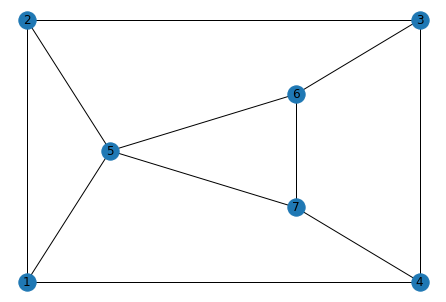

Graph number 5 has solutions with:
{x0: 90.0000000000000, x1: 90.0 - x2}

{x0: 90.0000000000000, x1: 45.0000000000000, x2: 45.0000000000000}



In [9]:
P = load_ang_perms('equiang_3_perms.txt')
for N in FinalNodes_3:
    ig = N[0].iG
    Graphs3_3[ig].draw()
    print(f'Graph number {ig} has solutions with:')
    sols = []
    for G in N:
        a=solve(G.AngleEqs)
        if a not in sols:
            sols.append(a)
            print(a)
            print()

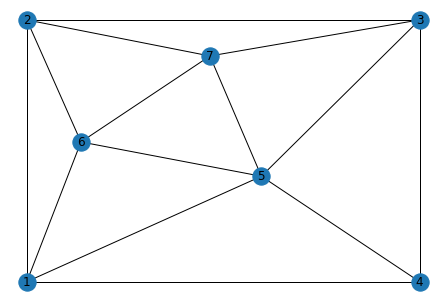

Graph number 1 has solutions with:
{x0: 90.0000000000000, x1: 180.0 - x2, x3: 90.0000000000000}

{x0: 90.0000000000000, x1: 90.0000000000000, x2: 180.0 - x3}



In [10]:
L = []
for N in FinalNodes_4:
    ig = N[0].iG
    L.append(Graphs3_4[ig])
    Graphs3_4[ig].draw()
    print(f'Graph number {ig} has solutions with:')
    sols = []
    for G in N:
        a=solve(G.AngleEqs)
        if a not in sols:
            sols.append(a)
            print(a)
            print()